# Importing Dataset


In [1]:
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_csv('Advertising.csv')
df= pd.DataFrame(ds)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Target data is numeric value so its a regression case



In [3]:
df.shape


(200, 5)

200 rows and 5 columns



In [4]:
df.isnull().sum()


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No null values present Sales is the target label



In [5]:
df.dtypes


Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Datatype is numeric



In [6]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Visualization


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

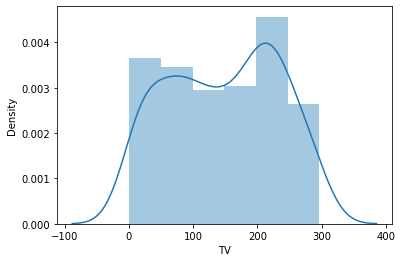

In [10]:
sns.distplot(df['TV'], kde=True)
# Importing warings and ignoring waring if any present
import warnings
warnings.filterwarnings('ignore')


data is not normally distributed, skewness and outliers present



<AxesSubplot:xlabel='radio', ylabel='Density'>

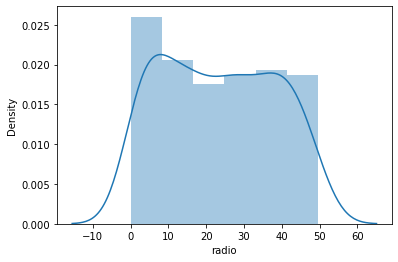

In [11]:
sns.distplot(df['radio'], kde=True)


data is not normally distributed, skewness and outliers present



<AxesSubplot:xlabel='newspaper', ylabel='Density'>

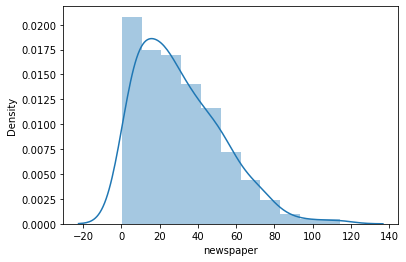

In [12]:
sns.distplot(df['newspaper'], kde=True)


data is not normally distributed, skewness and outliers present



<AxesSubplot:xlabel='sales', ylabel='Density'>

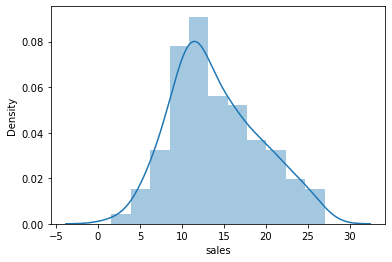

In [13]:
sns.distplot(df['sales'], kde=True)


data is not normally distributed, skewness and outliers present



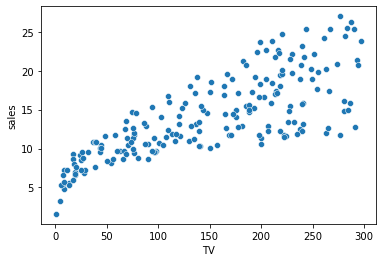

In [14]:
g=sns.scatterplot(x="TV",y="sales" ,data=df)


Sales of TV is increasing



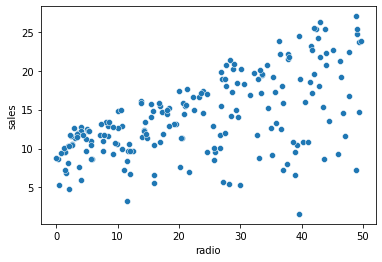

In [15]:
g=sns.scatterplot(x="radio",y="sales" ,data=df,)


Radio sales are also increasing



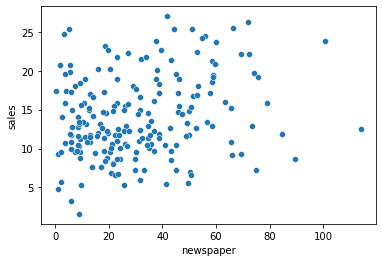

In [16]:
g=sns.scatterplot(x="newspaper",y="sales",data=df)


Newspaper sales has concentrated numbers range from 0 to 40.



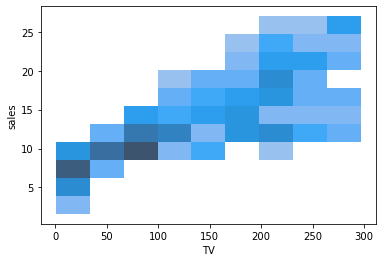

In [18]:
g=sns.histplot(x="TV",y="sales",data=df)


Sales of TV is increasing



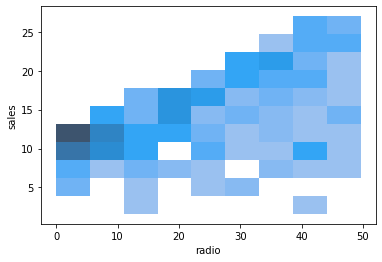

In [19]:
g=sns.histplot(x="radio",y="sales",data=df)


Sales of Radio is increasing



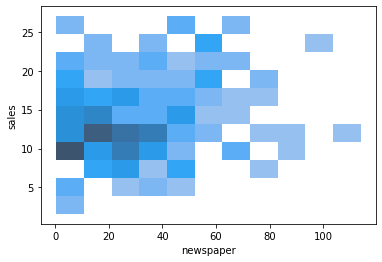

In [21]:
g=sns.histplot(x="newspaper",y="sales",data=df)


Sale of newspaper is concentrated to 0-80.



# Describing the dataset


In [22]:
df.describe()


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Key Observations:

Mean and Median: Values of mean and median have small differences 75% percentile and max: Unnamed:0 , TV and newspaper have large difference so Outliers are present. Standard deviation is less than mean so high peak data

<AxesSubplot:>

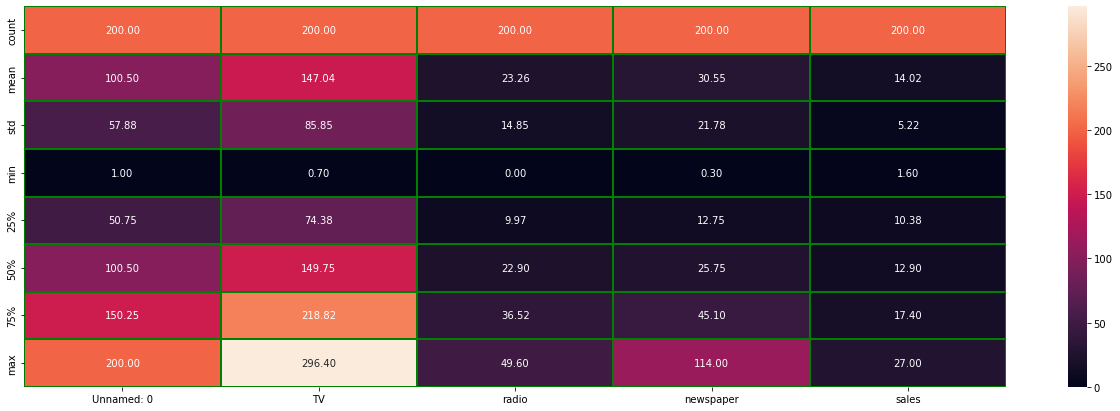

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description



# Correlation of the columns with the target columns:


In [24]:
df.corr()


,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


correlation of input with target variable



<AxesSubplot:>

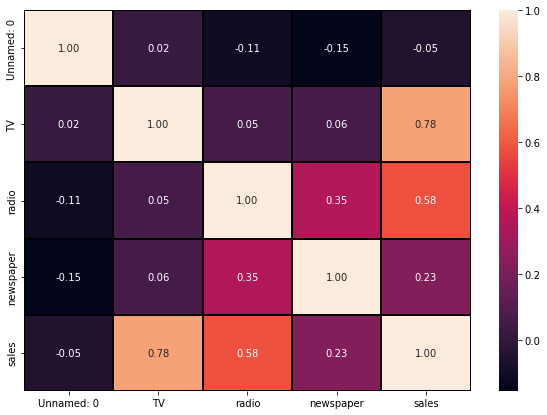

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Sales have positive coorelation with TV and negative coorelation with Unnamed 0

TV has negative correlation with Unnamed O and positive correlation with Sales

so dropping unnamed:O column

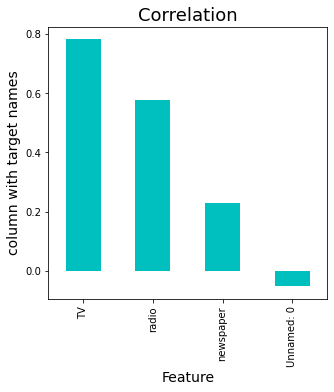

In [26]:
plt.figure(figsize=(5,5))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Only Unnamed: 0 has negative correlation with target label: sales



# Data Cleaning:


In [27]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Unnamed: 0 column dropped



# Skewness:


In [28]:
#Skewness:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Skewness range is -/+ 0.5 so the dataset has considerable amount of skewness so not treating it.



# Outliers:


TV              AxesSubplot(0.125,0.657941;0.352273x0.222059)
radio        AxesSubplot(0.547727,0.657941;0.352273x0.222059)
newspaper       AxesSubplot(0.125,0.391471;0.352273x0.222059)
sales        AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

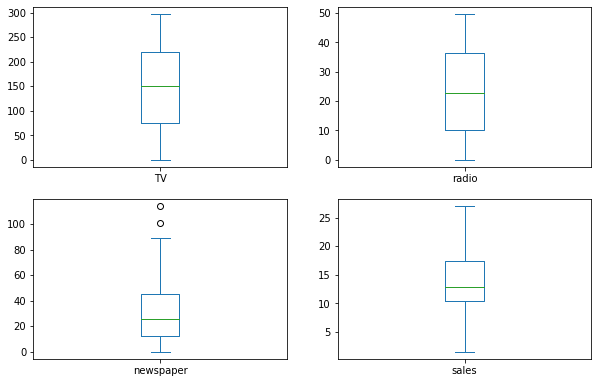

In [29]:
df.plot(kind='box',subplots=True,layout=(3,2),figsize=(10,10))


Only newapaper column has outliers so need to remove it.



In [30]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [31]:
#removing value greater than threshold value 

df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Outliers removed



In [32]:
df=df_new


In [33]:
df.shape


(198, 4)

new rows: 198 and column : 5



Percentage Loss of data


In [35]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

1% loss of data



# Separating the columns into features and target:


In [36]:
x =df.drop("sales",axis=1)
y =df["sales"]

# Scaling Data


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

# Model Selection :


Linear Regression:


In [39]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [40]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.8898322019518987
At random state 0,the testing accuracy is:- 0.9098946359000559


At random state 1,the training accuracy is:- 0.8946050839431845
At random state 1,the testing accuracy is:- 0.8912199077372979


At random state 2,the training accuracy is:- 0.9105689646648081
At random state 2,the testing accuracy is:- 0.838126673363757


At random state 3,the training accuracy is:- 0.8944143192604463
At random state 3,the testing accuracy is:- 0.8980994665131538


At random state 4,the training accuracy is:- 0.8981805823414822
At random state 4,the testing accuracy is:- 0.8719021920124682


At random state 5,the training accuracy is:- 0.8994368014551729
At random state 5,the testing accuracy is:- 0.8616494043950312


At random state 6,the training accuracy is:- 0.8993028842288798
At random state 6,the testing accuracy is:- 0.8760639888444908


At random state 7,the training accuracy is:- 0.8907422790206732
At random state 7,the testing accu

In [41]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

0.9300192208914474

93% is Linear regression score



In [42]:
#Predicted data
pred=lr.predict(test_x)
pred

array([13.79787109,  6.87859548, 10.02227261,  8.99977013,  8.51158997,
       12.7564214 , 10.72423401, 12.08028327, 21.06978079, 20.74989813,
       15.39703312, 21.52232475,  5.40443507, 17.17767909, 12.45947343,
        5.52510295, 15.7168206 , 21.99683841, 12.67919673, 15.43287384,
        7.85194967,  8.86698047, 14.7561965 ,  9.43152253, 16.79173052,
       20.46778637, 15.13265518,  9.85500302, 23.90300687, 10.14381842,
       13.7446561 , 18.31466298, 15.18466091, 17.98430559, 13.90782389,
       10.18990567, 10.28387204, 23.00008118, 23.03371573, 20.27317926])

Predicted Data in array form



In [43]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))

Mean squared error: 2.261932301122588
Mean absolute error: 1.1960710701176551
R2Score: 0.9300192208914474


R2Score is 92.9%



# Cross-Validation of the model:


In [44]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8886177292201751 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 3 the cv score is 0.8890406332045907 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 4 the cv score is 0.8880501918930908 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 5 the cv score is 0.885360575668391 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 6 the cv score is 0.8868174285063072 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 7 the cv score is 0.883828289486476 and accuracy score for training is 0.8832087051413472 and accuracy for the testing is 0.9300192208914474


At cross fold 8 the cv score is 0.8880334554150219 and

Since the number of folds dont have such impact on the accuracy and cv_score. So cv=5 is selected.

Hence we handled the problem of the overfitting and the underfitting by checking the training and testing score.

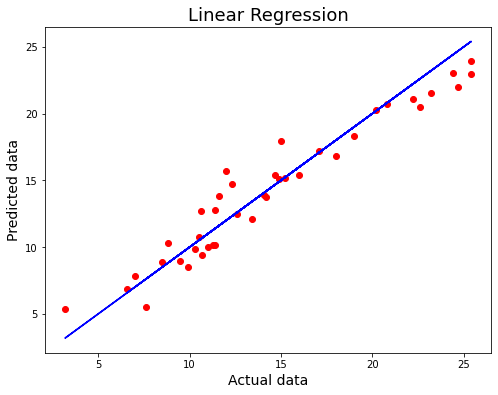

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Plotting of Predicted and actual data



# Regularization


In [46]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


Best parameters for Linear Regression



In [48]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.8824179429049469
r2 score 92.50218493254579


Ls score is 88% and r2score is 92.5%



In [49]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8870590310349007

CV_mean value is 88.7%



# Random Forest Regressor


In [50]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


Best parameters for RandomForestRegressor



In [51]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
pred_decision = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=9)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

rf score 0.9961661172061095
R2 Score: 98.21915854643993
Cross Val Score: 97.78095648820292


rf score 99.6% R2 Score: 98% Cross Val Score: 97.7%



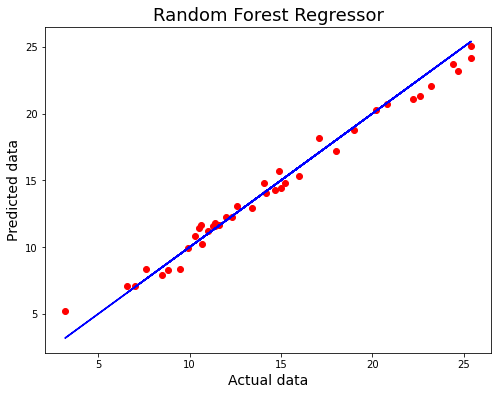

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_decision, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

# Decision Tree Regressor


In [53]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 0.25}


In [54]:
dt =DecisionTreeRegressor(criterion="mse",max_features="auto",max_depth= 4,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
pred_decision = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=9)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)

dt score 0.900235693792013
R2 Score: 84.14442139680706
Cross Val Score: 82.63188398496145


dt score 90% R2 Score: 84.1% Cross Val Score: 82.6%



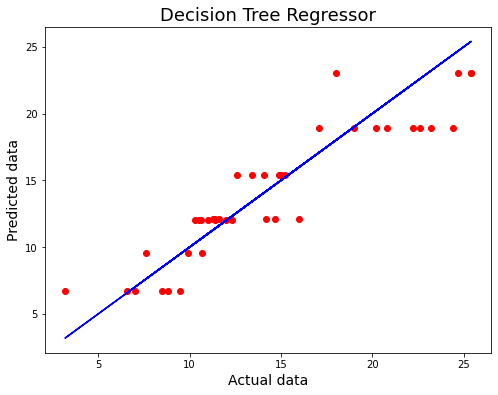

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_decision, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

# KNeighborsRegressor


In [56]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}


In [57]:
kn =KNeighborsRegressor(n_neighbors=6,algorithm="auto",weights='distance')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
pred_decision = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,pred_decision)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=9)
knc = knscore.mean()
print('Cross Val Score:',knc*100)

kn score 1.0
R2 Score: 95.21213797874465
Cross Val Score: 93.91492172875525


kn score 100% R2 Score: 95.2% Cross Val Score: 93.9%



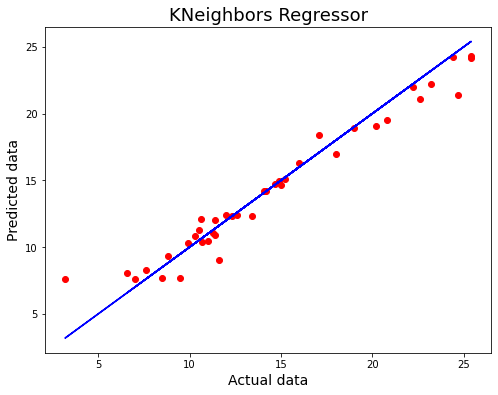

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_decision, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

Best Model is Random Forest Regressor as the rf score/ accuracy of model is 99.6%, Cross validation score score is 97.7% and r2score is 98% and the gap between cross validation score and r2score is very less.



# Model saving:


In [59]:
import pickle
filename = 'Advertisement.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:


In [60]:
import numpy as np
a=np.array(test_y)
pred_decision =np.array(rf.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": pred_decision},index=range(len(a)))
df_com

,original,predicted
0,11.6,11.646
1,6.6,7.069
2,11.0,11.202
3,9.5,8.372
4,9.9,9.958
5,11.4,11.785
6,10.5,11.427
7,13.4,12.910
8,22.2,21.094
9,20.8,20.744


As per observation model is predicting data approximately right.